# Test the model with color images

## Imports

In [1]:
import sys
import os

sys.path.append(os.path.abspath('../scripts'))

import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image

from scripts.predict import predict
from scripts.transformer import transform

## Vars

In [2]:
image_path = '../.data/output/image-asset.jpeg'
model_path = '../.data/output/model.tar'
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Functions

In [3]:
def showim(image, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()
    

def plot_prediction(percentages: dict):
    fig, ax = plt.subplots()
    p = ax.bar(percentages.keys(), percentages.values())
    ax.bar_label(p, label_type='center', fmt='%.2f%%')
    plt.show()

## Load the image

In [4]:
image = Image.open(image_path)

### Convert the image to an array

In [5]:
image_array = np.array(image)

height, width, channels = image_array.shape
print(f"Height: {height}, Width: {width}, Channels: {channels}")
print(f"Min pixel value: {image_array.min()}, Max pixel value: {image_array.max()}")

Height: 1737, Width: 2500, Channels: 3
Min pixel value: 0, Max pixel value: 255


### Preview image

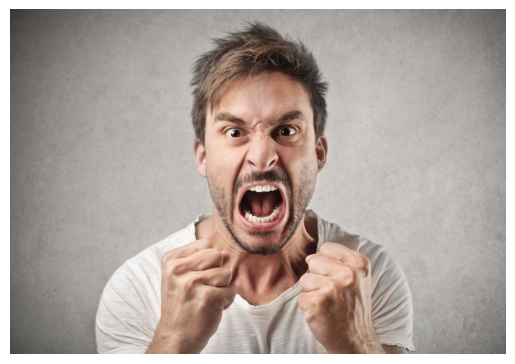

In [6]:
showim(image_array)

## Transform the image using the transformer

In [7]:
gray_image, trans_image = transform(image)

### Display the gray image

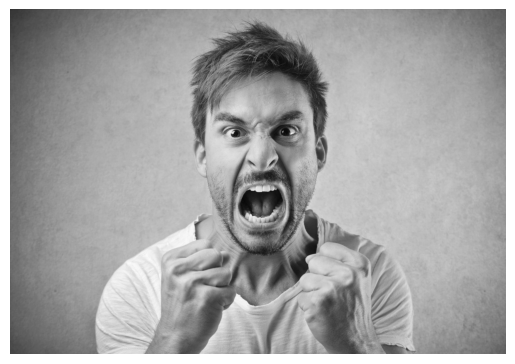

In [8]:
showim(np.array(gray_image), cmap='gray')

### Display the transformed image

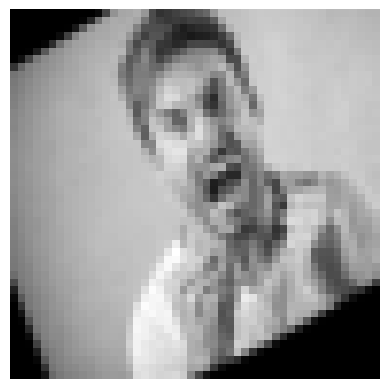

In [9]:
showim(trans_image.permute(1, 2, 0), cmap='gray')

## Predict the emotion

In [10]:
prediction, percentages = predict(trans_image)

Predicted emotion: Neutral


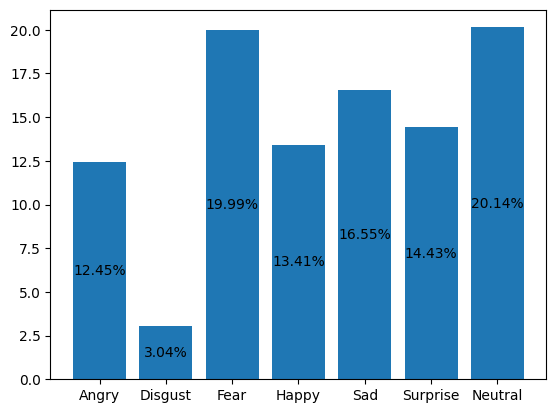

In [11]:
print(f'Predicted emotion: {prediction}')
plot_prediction(percentages)

In [12]:
percentages[prediction]

20.141945